In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Los datos en USArrests contiene los arrestos, por 100000 residentes, en los delitos de asalto, asesinato y violación, además de porcentaje de la población viviendo en zonas urbanas, en los 50 estados de Estados Unidos en 1973. Con estos datos, realiza lo siguiente.

* Verifica que la distancia euclideana como medida de disimilaridad, es proporcional a la distancia basada en la correlación, es decir, 1 − rij es proporcional a la distancia euclideana (al cuadrado), donde rij indica la correlación entre los objetos i y j, donde previamente se han estandarizado los datos (i.e. media 0 y desviación estándar 1). Puedes usar algún método de visualización para mostrar el resultado.

In [2]:
path = 'USArrests.csv'
data = pd.read_csv(path, index_col = 0) # 1ra columna del df como indice del df
print(data.head(10))
print(data.shape)

             Murder  Assault  UrbanPop  Rape
Alabama        13.2      236        58  21.2
Alaska         10.0      263        48  44.5
Arizona         8.1      294        80  31.0
Arkansas        8.8      190        50  19.5
California      9.0      276        91  40.6
Colorado        7.9      204        78  38.7
Connecticut     3.3      110        77  11.1
Delaware        5.9      238        72  15.8
Florida        15.4      335        80  31.9
Georgia        17.4      211        60  25.8
(50, 4)


In [3]:
# Matrix data
X = data.values
print(X[0:4,:])
print(X.shape)

[[ 13.2 236.   58.   21.2]
 [ 10.  263.   48.   44.5]
 [  8.1 294.   80.   31. ]
 [  8.8 190.   50.   19.5]]
(50, 4)


In [4]:
# Matrix data standarized
X_std = StandardScaler().fit_transform(X)
print(X_std[0:4,:])
print(X_std.shape)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]]
(50, 4)


In [5]:
MatrixCorr_1 = np.corrcoef(X_std, rowvar=False)
print(MatrixCorr_1)
print(MatrixCorr_1.shape)

[[1.         0.80187331 0.06957262 0.56357883]
 [0.80187331 1.         0.2588717  0.66524123]
 [0.06957262 0.2588717  1.         0.41134124]
 [0.56357883 0.66524123 0.41134124 1.        ]]
(4, 4)


In [6]:
MatrixCorr_2 = np.corrcoef(X_std, rowvar=True)
print(MatrixCorr_2)
print(MatrixCorr_2.shape)

[[ 1.          0.28616922 -0.44659478 ...  0.96159634 -0.79306752
   0.65671471]
 [ 0.28616922  1.          0.16927541 ...  0.38475333 -0.7768919
  -0.32770869]
 [-0.44659478  0.16927541  1.         ... -0.6034021   0.00497995
  -0.01671234]
 ...
 [ 0.96159634  0.38475333 -0.6034021  ...  1.         -0.77733457
   0.43813239]
 [-0.79306752 -0.7768919   0.00497995 ... -0.77733457  1.
  -0.3197538 ]
 [ 0.65671471 -0.32770869 -0.01671234 ...  0.43813239 -0.3197538
   1.        ]]
(50, 50)


Matriz de varianzas y covarianzas muestrales S:
\begin{align}
S & = \dfrac{1}{n} X^{'} P X \\
P & = I - \dfrac{1}{n} 1 1^{'} 
\end{align}

In [7]:
n = data.shape[1]
I = np.eye(n)
one = np.ones((n,1))
P = I - (1/n) * one @ one.T
S = (1/n) * X_std @ P @ X_std.T

In [8]:
print('Matriz de centrado P: \n', P)
print('\n')
print('Matriz de varianzas y covarianzas muestrales: \n', S)
print('\n')
print('Shape of P: \n', P.shape)
print('\n')
print('Shape of S: \n', S.shape)

Matriz de centrado P: 
 [[ 0.75 -0.25 -0.25 -0.25]
 [-0.25  0.75 -0.25 -0.25]
 [-0.25 -0.25  0.75 -0.25]
 [-0.25 -0.25 -0.25  0.75]]


Matriz de varianzas y covarianzas muestrales: 
 [[ 4.75726472e-01  2.64488136e-01 -1.59526716e-01 ...  3.24192587e-01
  -3.10124687e-01  8.32229546e-02]
 [ 2.64488136e-01  1.79559853e+00  1.17473421e-01 ...  2.52010493e-01
  -5.90218384e-01 -8.06826779e-02]
 [-1.59526716e-01  1.17473421e-01  2.68214492e-01 ... -1.52749416e-01
   1.46222226e-03 -1.59025229e-03]
 ...
 [ 3.24192587e-01  2.52010493e-01 -1.52749416e-01 ...  2.38925904e-01
  -2.15420545e-01  3.93481852e-02]
 [-3.10124687e-01 -5.90218384e-01  1.46222226e-03 ... -2.15420545e-01
   3.21436385e-01 -3.33081845e-02]
 [ 8.32229546e-02 -8.06826779e-02 -1.59025229e-03 ...  3.93481852e-02
  -3.33081845e-02  3.37579019e-02]]


Shape of P: 
 (4, 4)


Shape of S: 
 (50, 50)


\begin{equation}
R = D^{-1/2} S D^{-1/2}
\end{equation}

In [9]:
D_root = np.diag(pow(np.diag(S), -0.5))
R = D_root @ S @ D_root
print('Matriz de correlación: \n', R)
print('Shape of R: \n', R.shape)

Matriz de correlación: 
 [[ 1.          0.28616922 -0.44659478 ...  0.96159634 -0.79306752
   0.65671471]
 [ 0.28616922  1.          0.16927541 ...  0.38475333 -0.7768919
  -0.32770869]
 [-0.44659478  0.16927541  1.         ... -0.6034021   0.00497995
  -0.01671234]
 ...
 [ 0.96159634  0.38475333 -0.6034021  ...  1.         -0.77733457
   0.43813239]
 [-0.79306752 -0.7768919   0.00497995 ... -0.77733457  1.
  -0.3197538 ]
 [ 0.65671471 -0.32770869 -0.01671234 ...  0.43813239 -0.3197538
   1.        ]]
Shape of R: 
 (50, 50)


In [10]:
X_std_T = X_std.T

In [11]:
Ones = np.ones((data.shape[0], data.shape[0]))
Complement_R = Ones - R
Complement_R_2 = Complement_R*10

In [12]:
R_df         = pd.DataFrame(R)
Complement_R_df = pd.DataFrame(Complement_R)
Complement_R2_df = pd.DataFrame(Complement_R_2)

<AxesSubplot:>

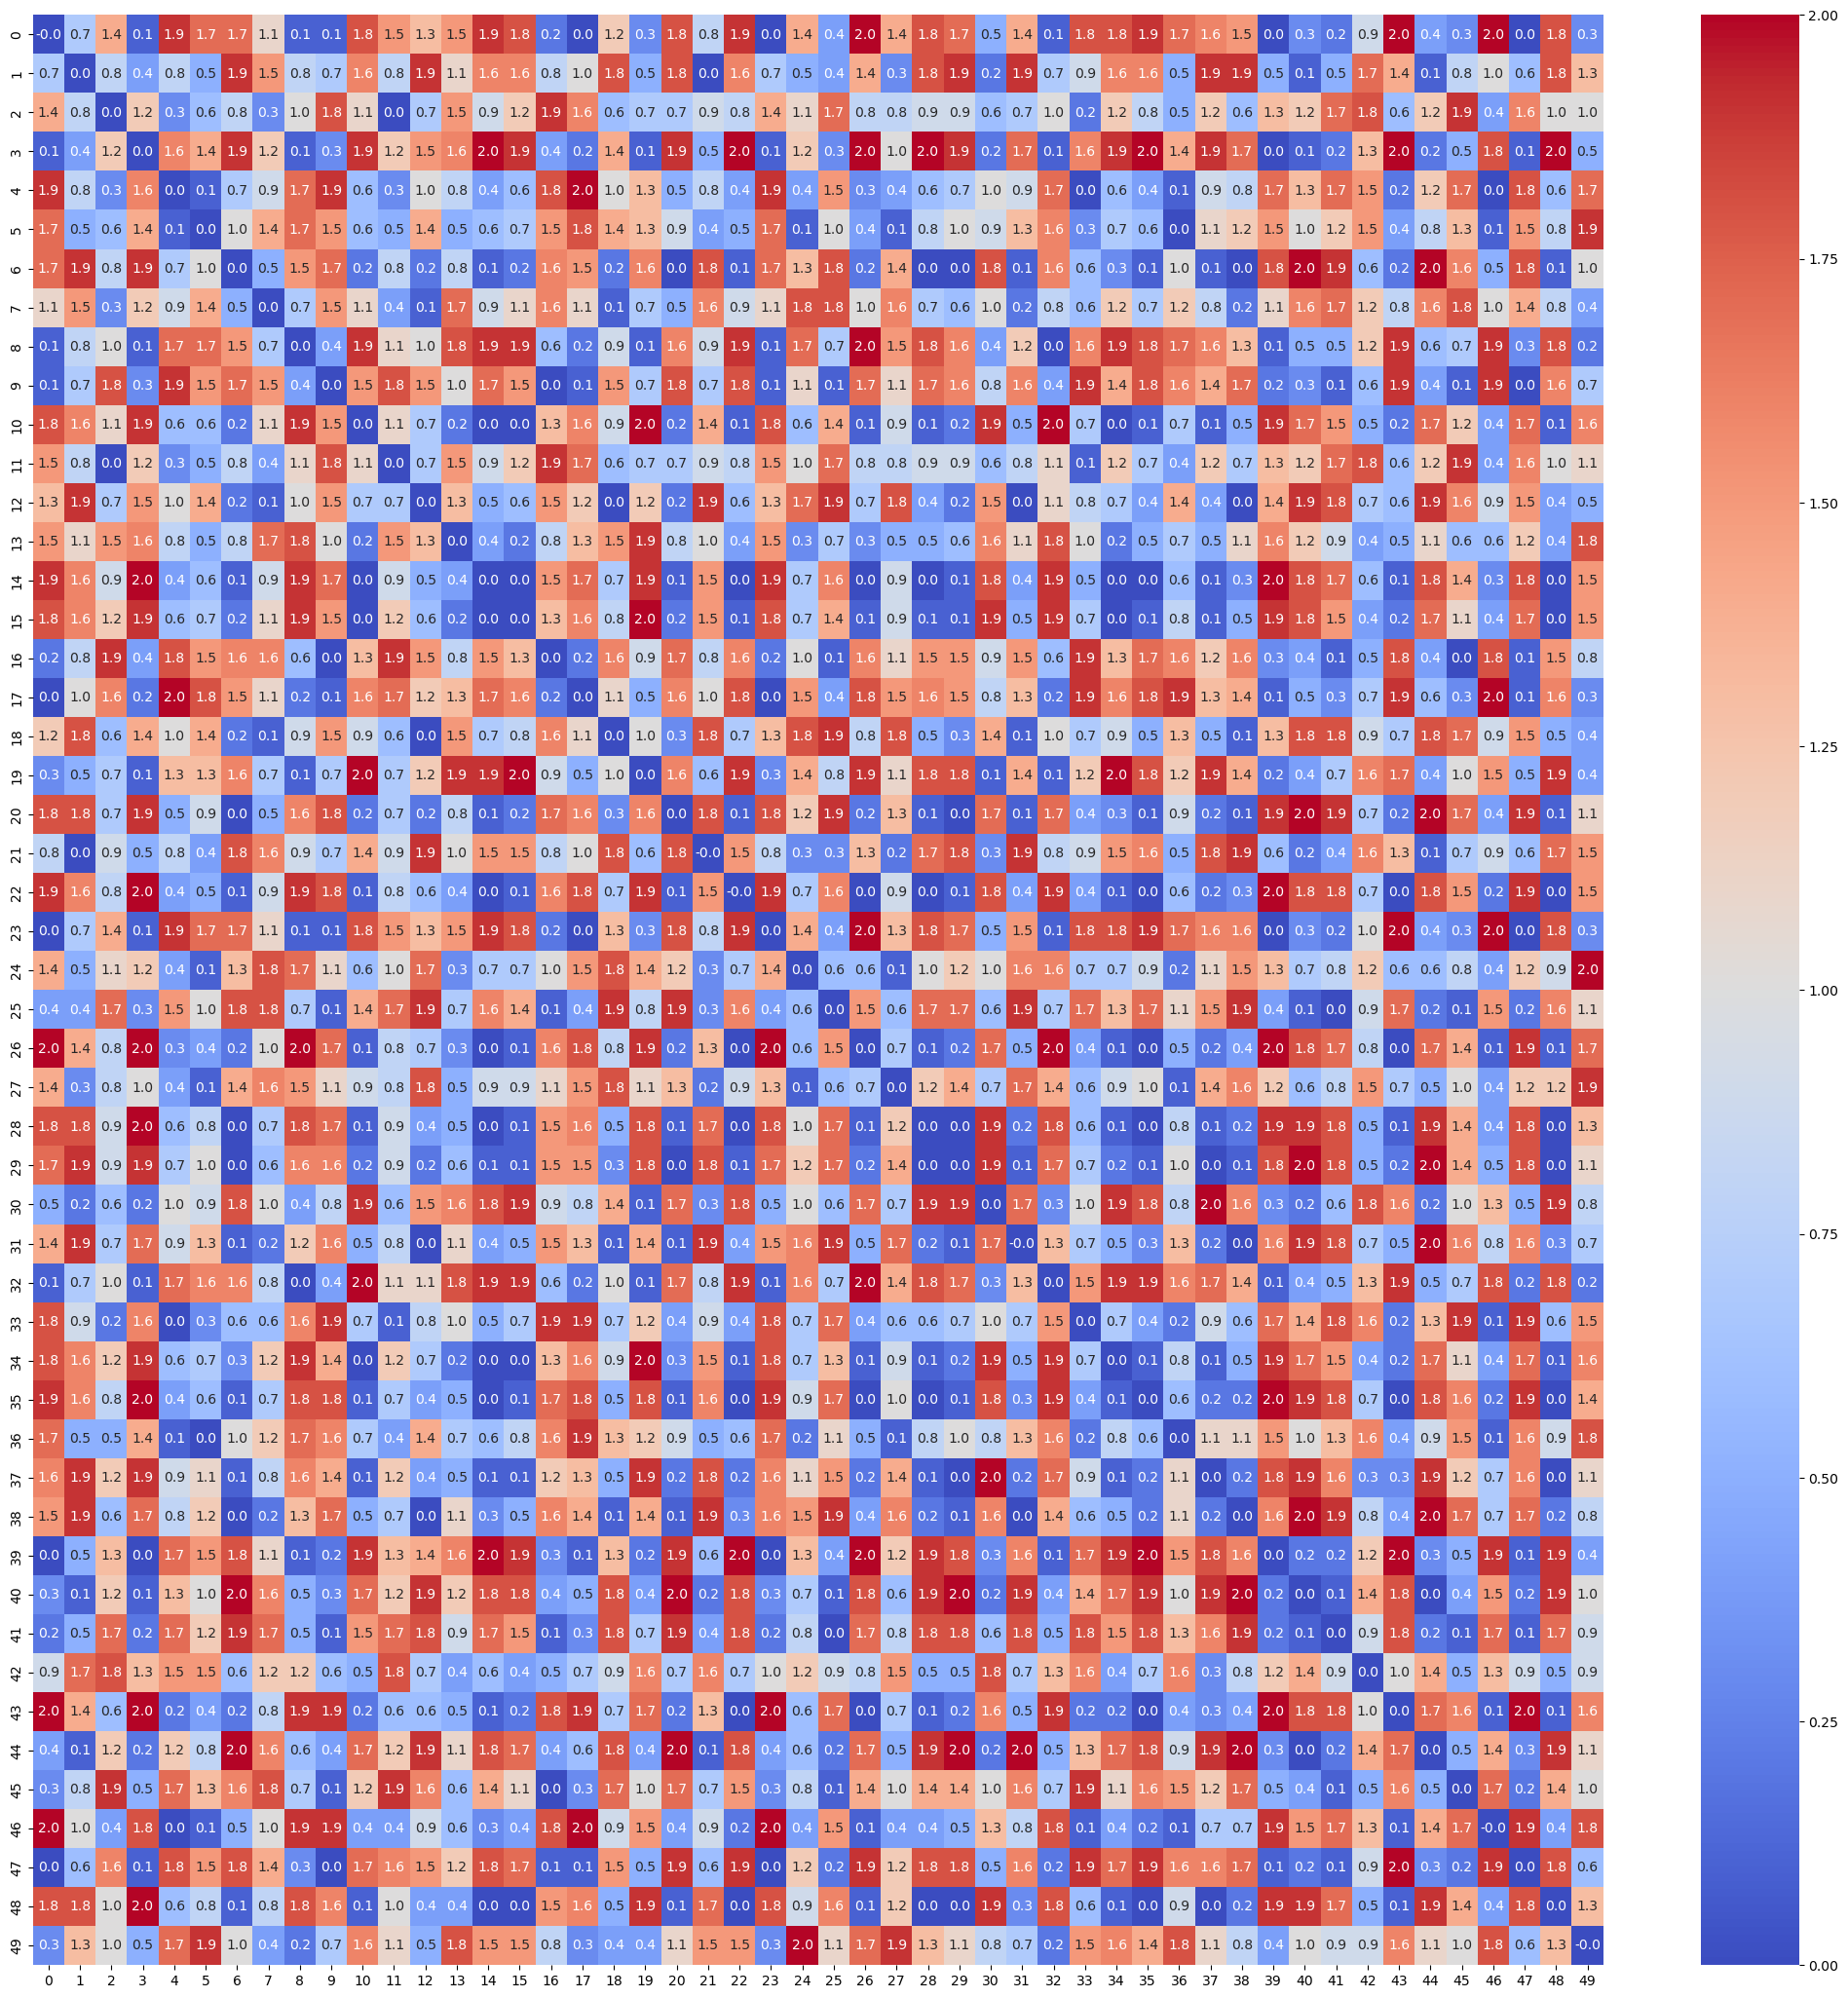

In [13]:
fig, ax = plt.subplots(figsize = (26,26))
data_corr = Complement_R_df
sns.heatmap(
            round(data_corr,1),
            annot=True,
            cmap="coolwarm",
            fmt = '.1f',
            linewidth = 0
           )

In [14]:
# Cargar los datos
from scipy.spatial.distance import euclidean
data = pd.read_csv('USArrests.csv', index_col=0)

# Estandarizar los datos
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Calcular las distancias euclidianas
euclidean_distances = np.zeros((len(data), len(data)))
for i in range(len(data)):
    for j in range(len(data)):
        euclidean_distances[i][j] = euclidean(X_std[i], X_std[j])**2

In [15]:
euclidean_distances_df = pd.DataFrame(euclidean_distances)
euclidean_distances_df.shape

(50, 50)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_R = pd.DataFrame(scaler.fit_transform(Complement_R_df))
norm_euclidean = pd.DataFrame(scaler.fit_transform(euclidean_distances_df))

<AxesSubplot:>

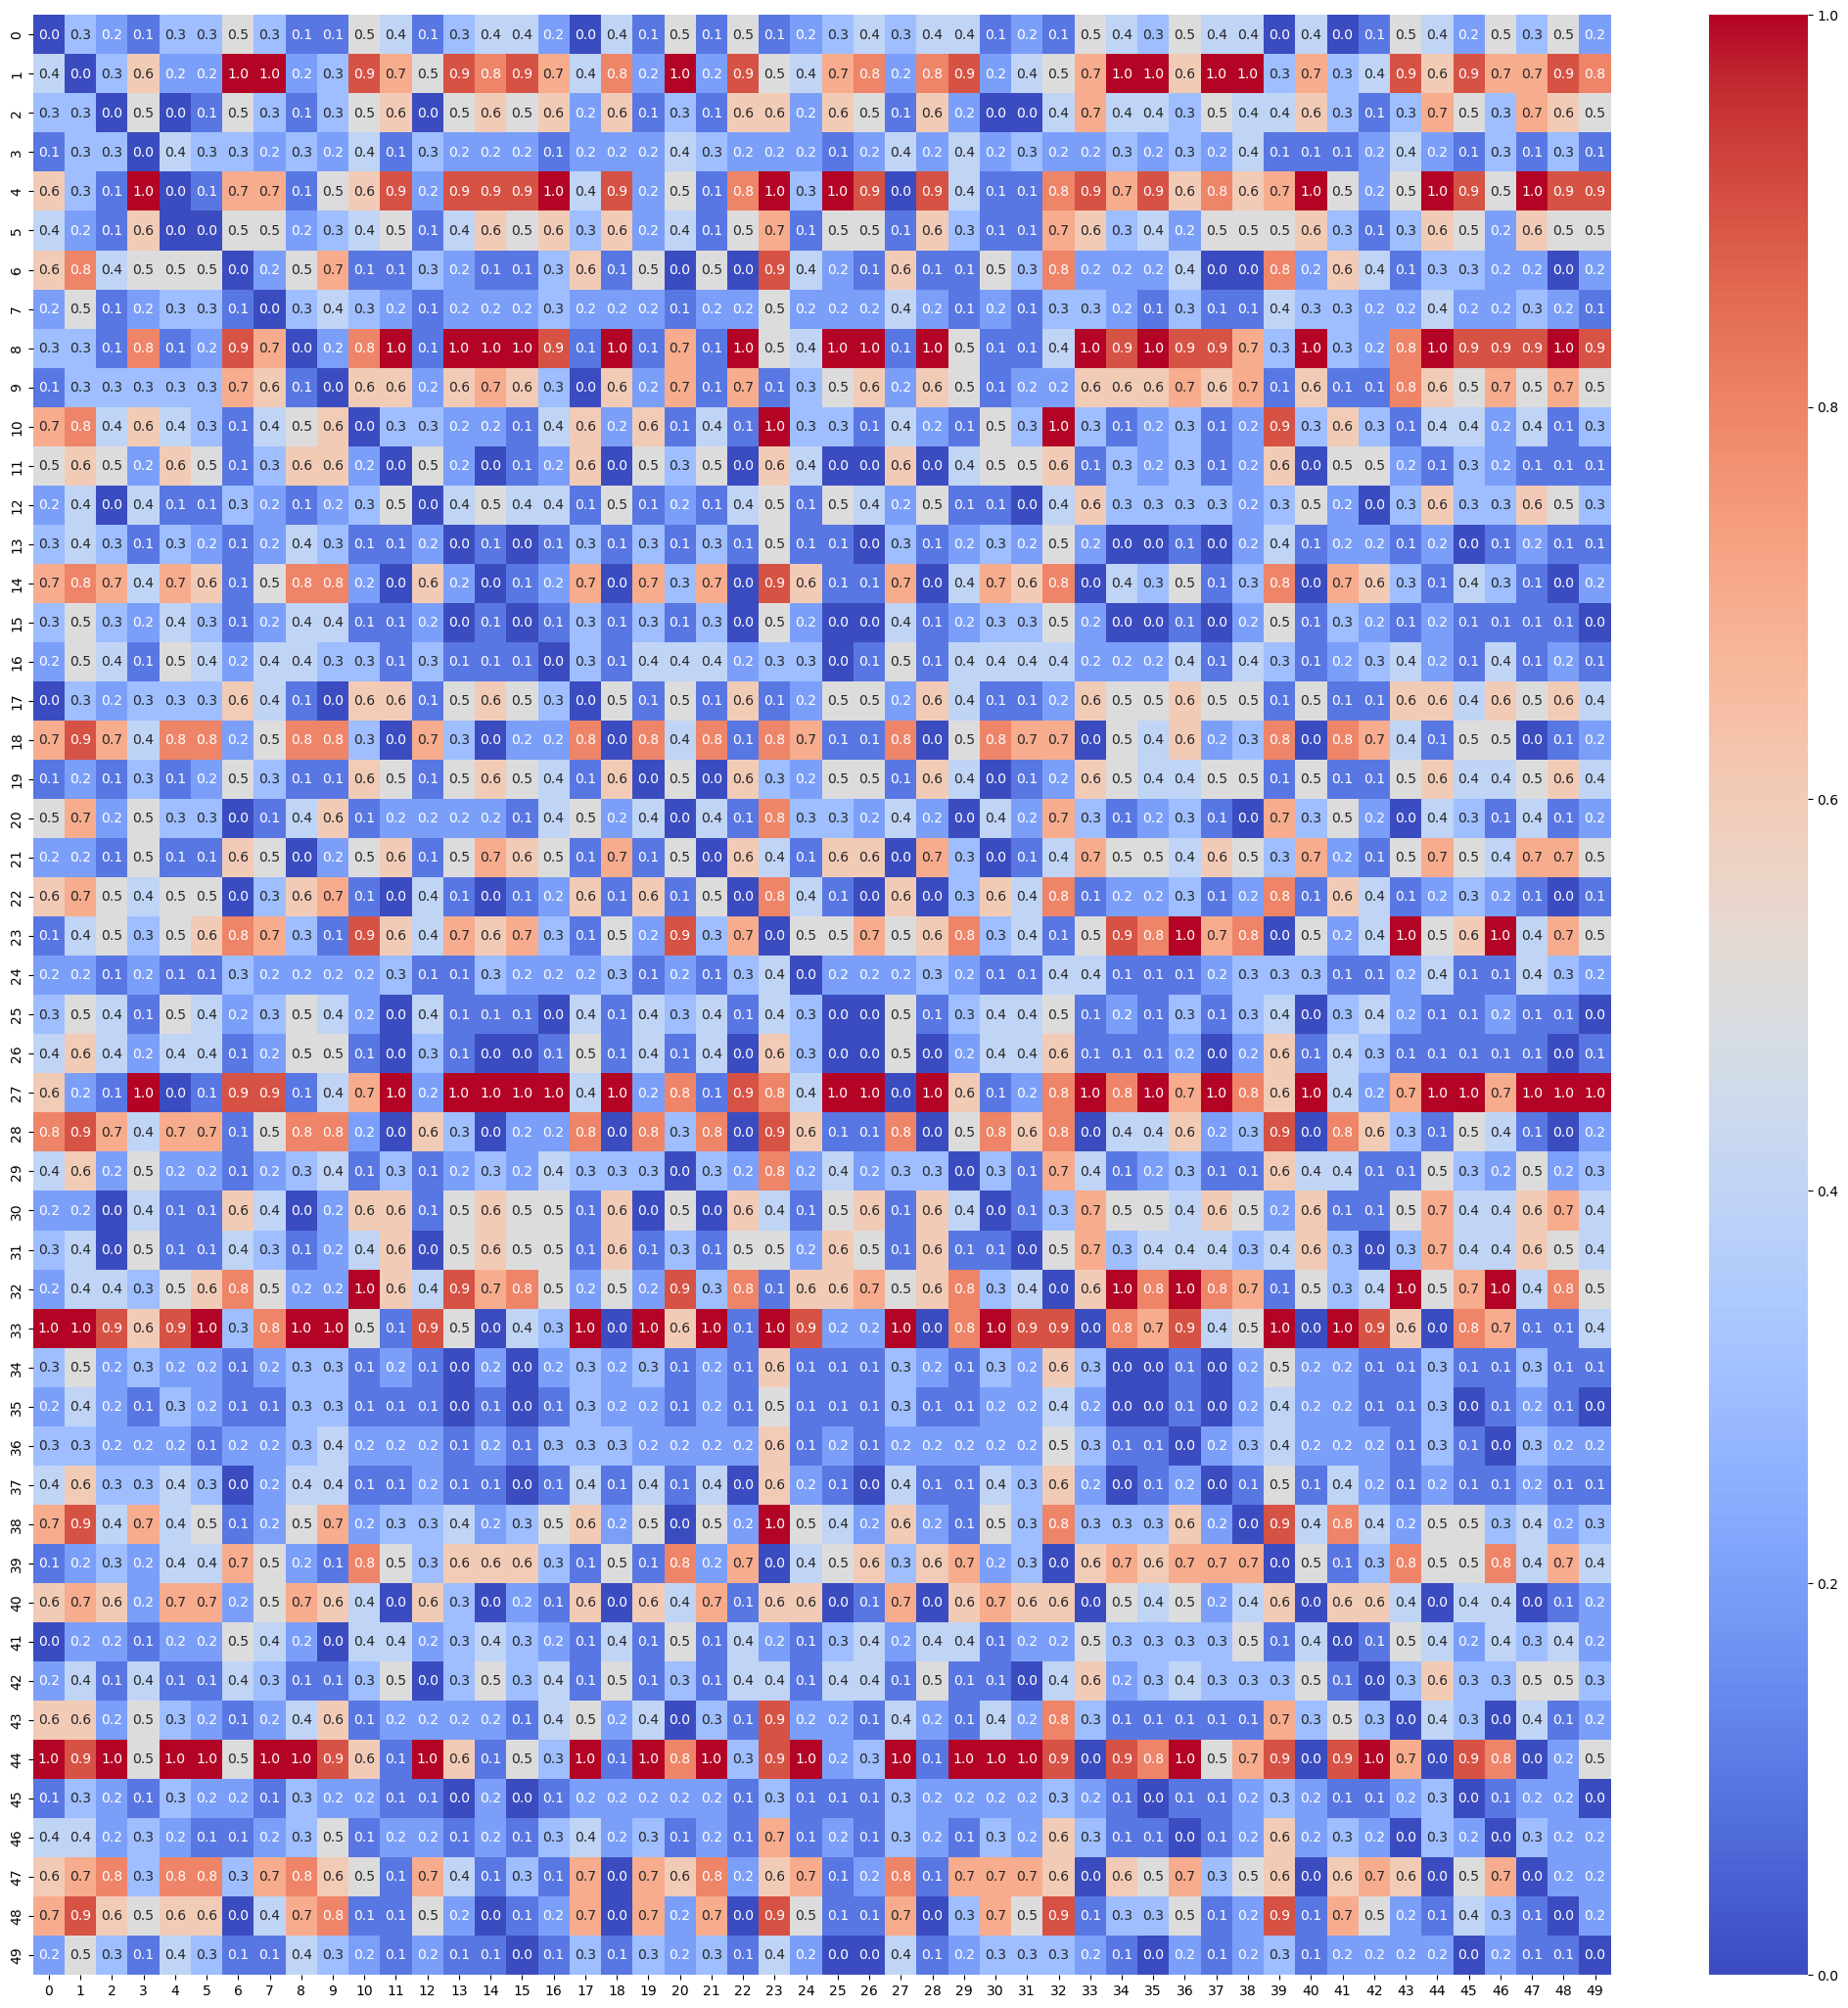

In [17]:
fig, ax = plt.subplots(figsize = (26,26))
data_corr = norm_euclidean
sns.heatmap(
            round(data_corr,1),
            annot=True,
            cmap="coolwarm",
            fmt = '.1f',
            linewidth = 0
           )

<AxesSubplot:>

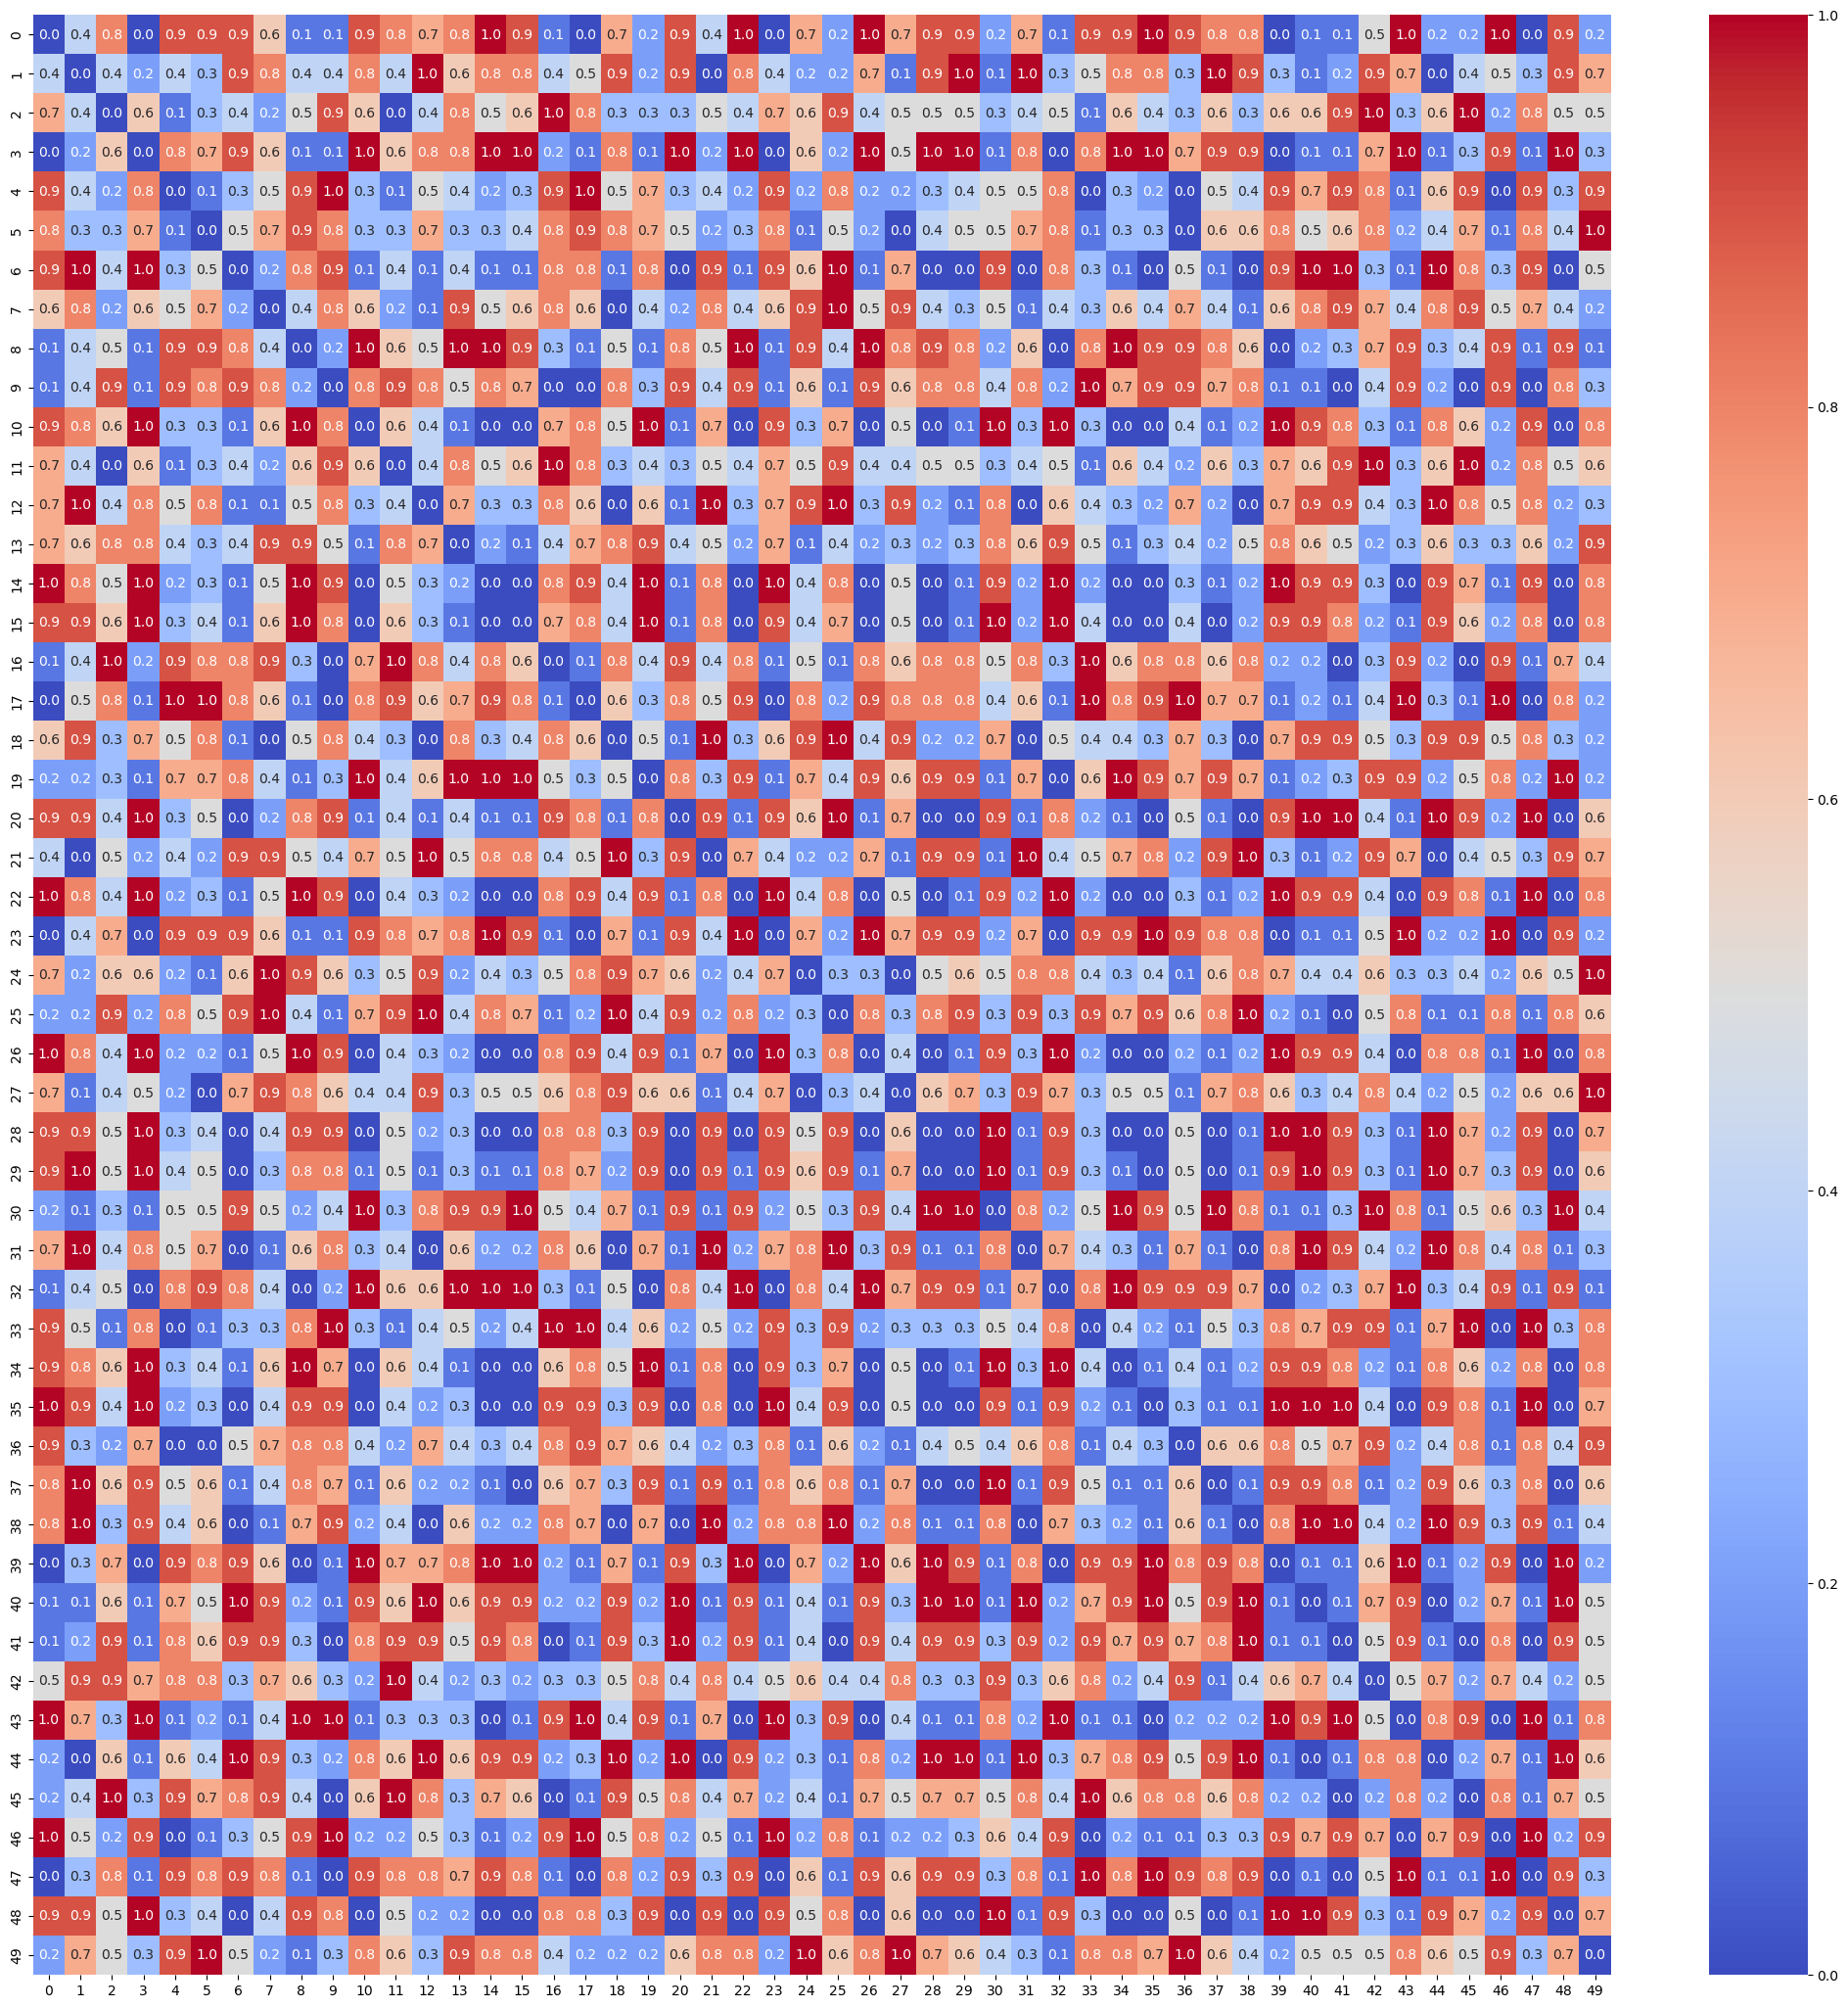

In [18]:
fig, ax = plt.subplots(figsize = (26,26))
data_corr = norm_R
sns.heatmap(
            round(data_corr,1),
            annot=True,
            cmap="coolwarm",
            fmt = '.1f',
            linewidth = 0
           )

In [20]:
np.sum( (X_std[0] - X_std[1])**2)

7.459475597747406